In [11]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path

epochs = 20

In [12]:
path_clas = Path('/home/ubuntu/data/autopsy')

batch_size=32

drop_mult=0.1
learning_rate= 1e-3
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [13]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.freeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


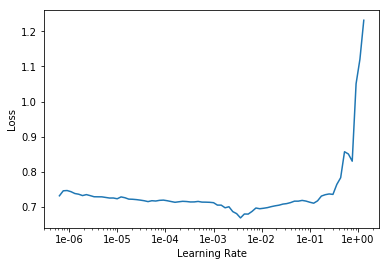

In [15]:
learn.recorder.plot()

In [16]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:52
epoch  train_loss  valid_loss  accuracy
1      0.641922    0.652800    0.667954  (00:02)
2      0.521671    0.381221    0.845560  (00:02)
3      0.421980    0.328291    0.891892  (00:02)
4      0.370605    0.218398    0.907336  (00:02)
5      0.323703    0.278711    0.899614  (00:02)
6      0.309454    0.233557    0.911197  (00:02)
7      0.326362    0.233692    0.922780  (00:02)
8      0.316118    0.195868    0.926641  (00:02)
9      0.273204    0.194207    0.918919  (00:02)
10     0.220418    0.189396    0.911197  (00:02)
11     0.246139    0.223854    0.891892  (00:02)
12     0.261382    0.226335    0.903475  (00:02)
13     0.235559    0.208413    0.903475  (00:02)
14     0.191296    0.198641    0.918919  (00:02)
15     0.269314    0.190207    0.926641  (00:02)
16     0.195108    0.199444    0.918919  (00:02)
17     0.197006    0.211815    0.918919  (00:02)
18     0.168541    0.223549    0.918919  (00:02)
19     0.210174    0.222089    0.922780  (00:02)
20     0.17

In [17]:
learn.validate()

[0.20245735, tensor(0.9266)]

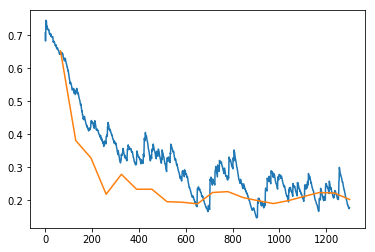

In [18]:
learn.recorder.plot_losses()

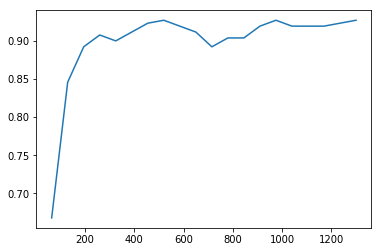

In [19]:
learn.recorder.plot_metrics()

In [20]:
import torch

torch.cuda.empty_cache()